In [11]:
# Step 1: Import Libraries
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [12]:
# Step 2: Define Paths
train_dir = 'Dataset'
val_dir = 'Dataset'

# Step 3: Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Step 4: Load Pre-trained VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg.trainable = False

Found 390 images belonging to 3 classes.
Found 390 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# Step 4: Load Pre-trained VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg.trainable = False



inputs = Input(shape=(224, 224, 3))
x = vgg(inputs, training=False)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Step 6: Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Step 7: Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=7,
    callbacks=[checkpoint, early_stop]
)

# Step 8: Save Model
model.save('vgg16.keras')

print("Model saved as vgg16.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.4556 - loss: 1.2737 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 502s 40s/step - accuracy: 0.4626 - loss: 1.2592 - val_accuracy: 0.7718 - val_loss: 0.4922
Epoch 2/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 475s 38s/step - accuracy: 0.7132 - loss: 0.5783 - val_accuracy: 0.8949 - val_loss: 0.2244
Epoch 3/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 473s 39s/step - accuracy: 0.8605 - loss: 0.2900 - val_accuracy: 0.9513 - val_loss: 0.1527
Epoch 4/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 471s 38s/step - accuracy: 0.9334 - loss: 0.1958 - val_accuracy: 0.9769 - val_loss: 0.1185
Epoch 5/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 497s 40s/step - accuracy: 0.9361 - loss: 0.1653 - val_accuracy: 0.9795 - val_loss: 0.1018
Epoch 6/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 471s 38s/step - accuracy: 0.9487 - loss: 0.1379 - val_accuracy: 0.9974 - val_loss: 0.0605
Epoch 7/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 469s 38s/step - accuracy: 0.9714 - loss: 0.0947 - val_accuracy: 0.9897 - val_loss: 0.0730
Model saved as vgg16.keras


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

val_generator.reset()  # Reset the generator before predicting
y_true = val_generator.classes

# Predict on validation data
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

13/13 ━━━━━━━━━━━━━━━━━━━━ 260s 19s/step
                      precision    recall  f1-score   support

Biodegradable Images       0.37      0.37      0.37       130
   Recyclable Images       0.34      0.34      0.34       130
        Trash Images       0.31      0.31      0.31       130

            accuracy                           0.34       390
           macro avg       0.34      0.34      0.34       390
        weighted avg       0.34      0.34      0.34       390



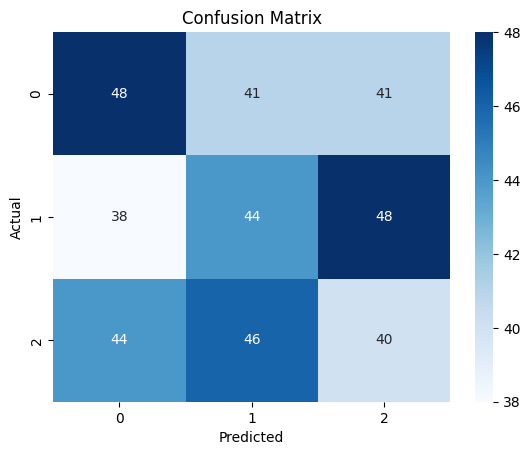

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           )

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

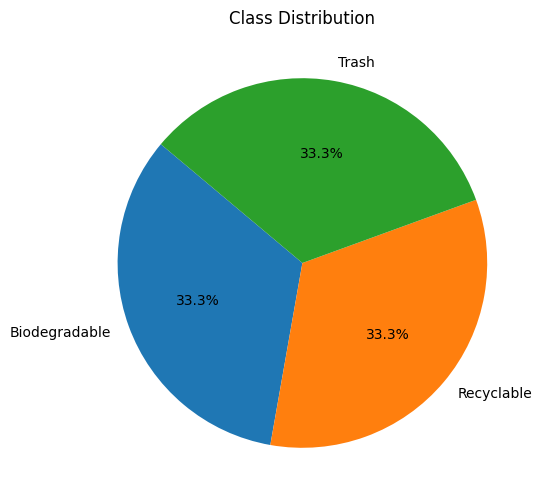

In [21]:
import matplotlib.pyplot as plt
class_counts = [100, 100, 100]  # Biodegradable, Recyclable, Trash
class_labels = ['Biodegradable', 'Recyclable', 'Trash']

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.savefig('pie_class_distribution.png')
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 241s 18s/step


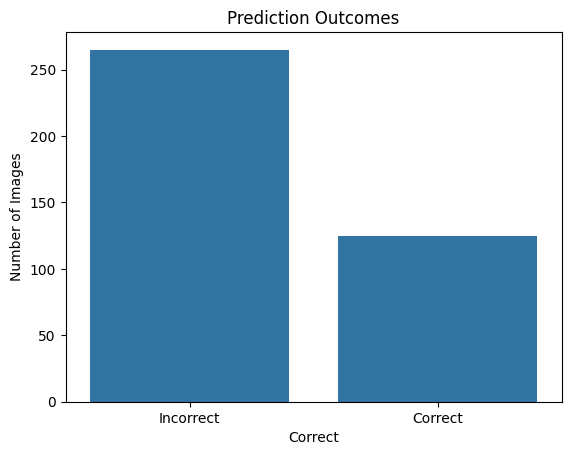

In [22]:
import seaborn as sns
import pandas as pd
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)


df = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})
df['Correct'] = df['Actual'] == df['Predicted']
result_counts = df['Correct'].value_counts()

sns.barplot(x=result_counts.index.map({True: 'Correct', False: 'Incorrect'}),
            y=result_counts.values)
plt.title('Prediction Outcomes')
plt.ylabel('Number of Images')
plt.savefig('prediction_outcomes.png')
plt.show()

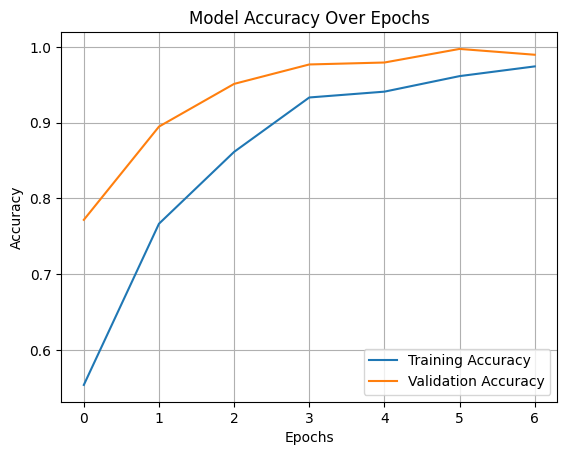

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_curve.png')
plt.show()

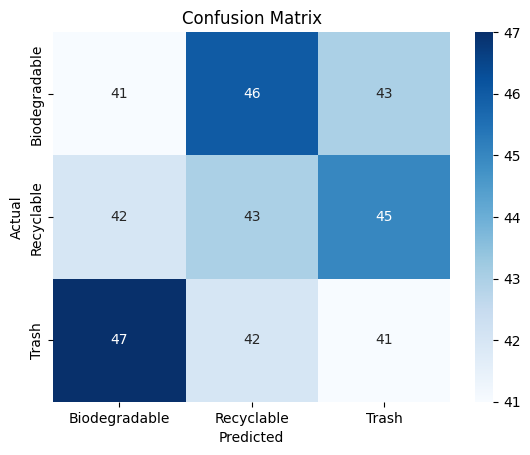

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

               precision    recall  f1-score
Biodegradable   0.315385  0.315385  0.315385
Recyclable      0.328244  0.330769  0.329502
Trash           0.317829  0.315385  0.316602
accuracy        0.320513  0.320513  0.320513
macro avg       0.320486  0.320513  0.320496
weighted avg    0.320486  0.320513  0.320496


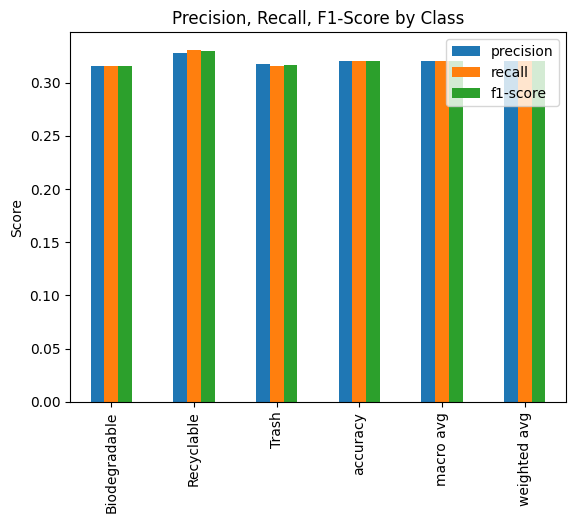

In [25]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print(df_report[['precision', 'recall', 'f1-score']])
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Precision, Recall, F1-Score by Class')
plt.ylabel('Score')
plt.savefig('class_performance_report.png')
plt.show()

               precision    recall  f1-score
Biodegradable   0.315385  0.315385  0.315385
Recyclable      0.328244  0.330769  0.329502
Trash           0.317829  0.315385  0.316602
accuracy        0.320513  0.320513  0.320513
macro avg       0.320486  0.320513  0.320496
weighted avg    0.320486  0.320513  0.320496


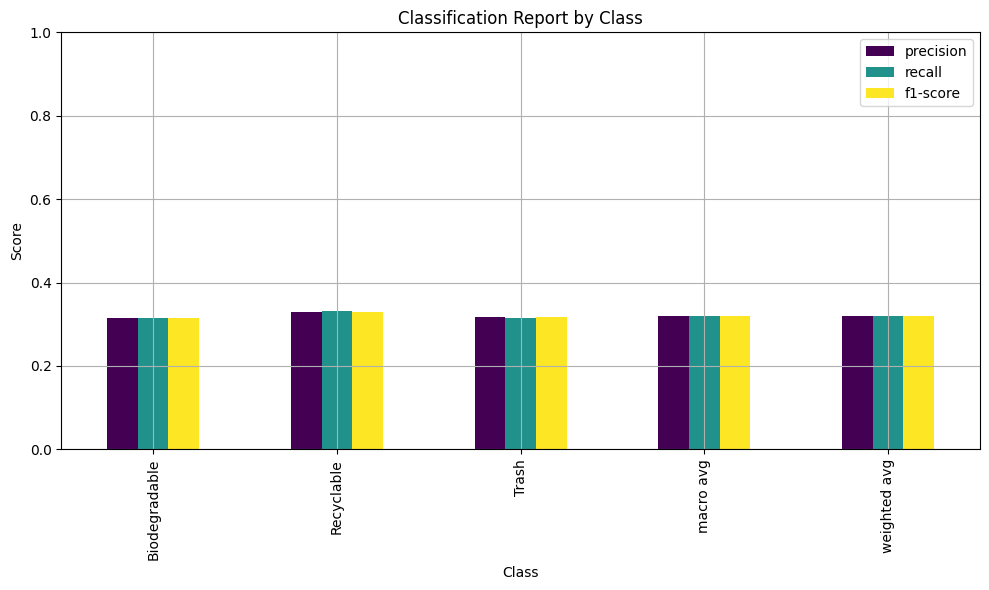

In [26]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

class_labels = ['Biodegradable', 'Recyclable', 'Trash']

report_dict = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df[['precision', 'recall', 'f1-score']])

report_df.to_csv('classification_report.csv')

# Bar plot for visual representation
report_df.drop('accuracy', errors='ignore')[['precision', 'recall', 'f1-score']].plot(
    kind='bar', figsize=(10, 6), colormap='viridis'
)

plt.title('Classification Report by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig('classification_report_plot.png')
plt.show()